# JAX-Fluids: Sod shock tube demo
This demo will demonstrate how you can run a simple 1D simulation with JAX-Fluids. Here, we simulate the Sod shock tube.

In [1]:
from jaxfluids import InputReader, Initializer, SimulationManager
from jaxfluids.post_process import load_data, create_lineplot

## Simulation Setup
To run a forward simulation with JAX-Fluids, you need an InputRead, an Initializer, and a SimulationManager.

The InputReader reads a case setup file (here, "01_case_setup_sod.json") and a numerical setup file (here, "01_numerical_setup_sod.json"). We can pass the path to those files as strings to the InputReader. The case setup specifies the physical setup of your simulation and the numerical setup specifies with which numerical methods you want to run your simulation.

In [2]:
input_reader = InputReader("01_case_setup_sod.json", "01_numerical_setup_sod.json")
initializer  = Initializer(input_reader)
sim_manager  = SimulationManager(input_reader)

## Run Simulation
The Initializer creates a dictionary which contains all initial flow fields. The SimulationManager runs the simulation and writes h5 output files.

In [3]:
buffer_dictionary = initializer.initialization()
sim_manager.simulate(buffer_dictionary)

*------------------------------------------------------------------------------*


*                                                                              *


*                                                                              *


*          _     _    __  __        _____  _      _   _  ___  ____   ____      *


*         | |   / \   \ \/ /       |  ___|| |    | | | ||_ _||  _ \ / ___|     *


*      _  | |  / _ \   \  /  _____ | |_   | |    | | | | | | | | | |\___ \     *


*     | |_| | / ___ \  /  \ |_____||  _|  | |___ | |_| | | | | |_| | ___) |    *


*      \___/ /_/   \_\/_/\_\       |_|    |_____| \___/ |___||____/ |____/     *


*                                                                              *


*                                By BB - ML@AER                                *


*                                                                              *


*------------------------------------------------------------------------------*


* JAX-FLUIDS -                                                                 *


*                                                                              *


* A fully-differentiable CFD solver for compressible two-phase flows.          *


* Copyright (C) 2022  Deniz A. Bezgin, Aaron B. Buhendwa, Nikolaus A. Adams    *


*                                                                              *


* This program is free software: you can redistribute it and/or modify         *


* it under the terms of the GNU General Public License as published by         *


* the Free Software Foundation, either version 3 of the License, or            *


* (at your option) any later version.                                          *


*                                                                              *


* This program is distributed in the hope that it will be useful,              *


* but WITHOUT ANY WARRANTY; without even the implied warranty of               *


* MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the                *


* GNU General Public License for more details.                                 *


*                                                                              *


* You should have received a copy of the GNU General Public License            *


* along with this program.  If not, see <https://www.gnu.org/licenses/>.       *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


* CONTACT                                                                      *


*                                                                              *


* deniz.bezgin@tum.de // aaron.buhendwa@tum.de // nikolaus.adams@tum.de        *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


* Munich, April 15th, 2022                                                     *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*                                                                              *


*                               NUMERICAL SETUP                                *


*                                                                              *


*    CONSERVATIVES                                                             *


*        HALO CELLS                   :    4                                   *


*        TIME INTEGRATION                                                      *


*          INTEGRATOR                 :    RK3                                 *


*          CFL                        :    0.9                                 *


*        CONVECTIVE FLUXES                                                     *


*          CONVECTIVE SOLVER          :    GODUNOV                             *


*          RIEMANN SOLVER             :    HLLC                                *


*          SIGNAL SPEED               :    EINFELDT                            *


*          SPATIAL RECONSTRUCTOR      :    WENO5-JS                            *


*          IS SAFE RECONSTRUCTION     :    False                               *


*          RECONSTRUCTION VAR         :    CHAR-CONSERVATIVE                   *


*        DISSIPATIVE FLUXES                                                    *


*          RECONSTRUCTION STENCIL     :    R4                                  *


*          DERIVATIVE STENCIL CENTER  :    DC4                                 *


*          DERIVATIVE STENCIL FACE    :    DF4                                 *


*                                                                              *


*    ACTIVE PHYSICS                                                            *


*        IS CONVECTIVE FLUX           :    True                                *


*        IS VISCOUS FLUX              :    False                               *


*        IS HEAT FLUX                 :    False                               *


*        IS VOLUME FORCE              :    False                               *


*                                                                              *


*    ACTIVE FORCINGS                                                           *


*        IS MASS FLOW FORCING         :    False                               *


*        IS TEMPERATURE FORCING       :    False                               *


*        IS TURB HIT FORCING          :    False                               *


*                                                                              *


*    OUTPUT                                                                    *


*        IS DOUBLE PRECISION COMPUTE  :    False                               *


*        IS DOUBLE PRECISION OUTPUT   :    False                               *


*        DERIVATIVE STENCIL           :    DC4                                 *


*        QUANTITIES                                                            *


*          PRIMES                     :    ['density', 'velocityX', 'pressure', 'temperature']*


*        LOGGING                      :    INFO                                *


*        IS XDMF                      :    False                               *


*                                                                              *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*                                  CASE SETUP                                  *


*                                                                              *


*    GENERAL                                                                   *


*        CASE NAME                    :    sod                                 *


*        SAVE PATH                    :    ./results                           *


*        END TIME                     :    0.2                                 *


*        SAVE DT                      :    0.01                                *


*                                                                              *


*    DOMAIN                                                                    *


*        X                                                                     *


*          CELLS                      :    100                                 *


*          RANGE                      :    [0.0, 1.0]                          *


*        Y                                                                     *


*          CELLS                      :    1                                   *


*          RANGE                      :    [0.0, 1.0]                          *


*        Z                                                                     *


*          CELLS                      :    1                                   *


*          RANGE                      :    [0.0, 1.0]                          *


*                                                                              *


*    BOUNDARY CONDITION                                                        *


*        TYPES                                                                 *


*          EAST                       :    neumann                             *


*          WEST                       :    neumann                             *


*          NORTH                      :    inactive                            *


*          SOUTH                      :    inactive                            *


*          TOP                        :    inactive                            *


*          BOTTOM                     :    inactive                            *


*                                                                              *


*    INITIAL CONDITION                                                         *


*        RHO                          :    lambda x: 1.0*(x <= 0.5) + 0.125*(x > 0.5)*


*        U                            :    0.0                                 *


*        V                            :    0.0                                 *


*        W                            :    0.0                                 *


*        P                            :    lambda x: 1.0*(x <= 0.5) + 0.1*(x > 0.5)*


*                                                                              *


*    MATERIAL PROPERTIES                                                       *


*        TYPE                         :    IdealGas                            *


*        DYNAMIC VISCOSITY            :    0.0                                 *


*        BULK VISCOSITY               :    0.0                                 *


*        THERMAL CONDUCTIVITY         :    0.0                                 *


*        SPECIFIC HEAT RATIO          :    1.4                                 *


*        SPECIFIC GAS CONSTANT        :    1.0                                 *


*                                                                              *


*    NONDIMENSIONALIZATION PARAMETERS                                          *


*        DENSITY REFERENCE            :    1.0                                 *


*        LENGTH REFERENCE             :    1.0                                 *


*        VELOCITY REFERENCE           :    1.0                                 *


*        TEMPERATURE REFERENCE        :    1.0                                 *


*                                                                              *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*                                                                              *


*          _     _    __  __        _____  _      _   _  ___  ____   ____      *


*         | |   / \   \ \/ /       |  ___|| |    | | | ||_ _||  _ \ / ___|     *


*      _  | |  / _ \   \  /  _____ | |_   | |    | | | | | | | | | |\___ \     *


*     | |_| | / ___ \  /  \ |_____||  _|  | |___ | |_| | | | | |_| | ___) |    *


*      \___/ /_/   \_\/_/\_\       |_|    |_____| \___/ |___||____/ |____/     *


*                                                                              *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 2.5355e-03                               *


*    CURRENT DT                     = 2.5355e-03                               *


*    CURRENT STEP                   =      1                                   *


*    WALL CLOCK TIMESTEP            = 1.4360e+00                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.4360e+00                               *


*    WALL CLOCK TIMESTEP CELL       = 1.4360e-02                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.4360e-02                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 4.8562e-03                               *


*    CURRENT DT                     = 2.3207e-03                               *


*    CURRENT STEP                   =      2                                   *


*    WALL CLOCK TIMESTEP            = 1.4477e+00                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.4477e+00                               *


*    WALL CLOCK TIMESTEP CELL       = 1.4477e-02                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.4477e-02                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 7.0562e-03                               *


*    CURRENT DT                     = 2.2001e-03                               *


*    CURRENT STEP                   =      3                                   *


*    WALL CLOCK TIMESTEP            = 4.3535e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 4.3535e-04                               *


*    WALL CLOCK TIMESTEP CELL       = 4.3535e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 4.3535e-06                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 9.2314e-03                               *


*    CURRENT DT                     = 2.1752e-03                               *


*    CURRENT STEP                   =      4                                   *


*    WALL CLOCK TIMESTEP            = 2.1410e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 2.1410e-04                               *


*    WALL CLOCK TIMESTEP CELL       = 2.1410e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 2.1410e-06                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.1371e-02                               *


*    CURRENT DT                     = 2.1392e-03                               *


*    CURRENT STEP                   =      5                                   *


*    WALL CLOCK TIMESTEP            = 5.9309e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.6433e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 5.9309e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.6433e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.3440e-02                               *


*    CURRENT DT                     = 2.0694e-03                               *


*    CURRENT STEP                   =      6                                   *


*    WALL CLOCK TIMESTEP            = 3.5405e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3855e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.5405e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3855e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.5495e-02                               *


*    CURRENT DT                     = 2.0550e-03                               *


*    CURRENT STEP                   =      7                                   *


*    WALL CLOCK TIMESTEP            = 3.8099e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2180e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.8099e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2180e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.7565e-02                               *


*    CURRENT DT                     = 2.0695e-03                               *


*    CURRENT STEP                   =      8                                   *


*    WALL CLOCK TIMESTEP            = 3.5810e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.0952e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.5810e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.0952e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.9579e-02                               *


*    CURRENT DT                     = 2.0141e-03                               *


*    CURRENT STEP                   =      9                                   *


*    WALL CLOCK TIMESTEP            = 3.1519e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 9.9769e-04                               *


*    WALL CLOCK TIMESTEP CELL       = 3.1519e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 9.9769e-06                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 2.1567e-02                               *


*    CURRENT DT                     = 1.9886e-03                               *


*    CURRENT STEP                   =     10                                   *


*    WALL CLOCK TIMESTEP            = 4.9217e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.4337e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.9217e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.4337e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 2.3562e-02                               *


*    CURRENT DT                     = 1.9943e-03                               *


*    CURRENT STEP                   =     11                                   *


*    WALL CLOCK TIMESTEP            = 3.8671e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3290e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.8671e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3290e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 2.5550e-02                               *


*    CURRENT DT                     = 1.9884e-03                               *


*    CURRENT STEP                   =     12                                   *


*    WALL CLOCK TIMESTEP            = 3.5691e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2406e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.5691e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2406e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 2.7509e-02                               *


*    CURRENT DT                     = 1.9586e-03                               *


*    CURRENT STEP                   =     13                                   *


*    WALL CLOCK TIMESTEP            = 3.2401e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1642e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.2401e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1642e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 2.9463e-02                               *


*    CURRENT DT                     = 1.9547e-03                               *


*    CURRENT STEP                   =     14                                   *


*    WALL CLOCK TIMESTEP            = 3.5405e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1019e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.5405e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1019e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 3.1428e-02                               *


*    CURRENT DT                     = 1.9646e-03                               *


*    CURRENT STEP                   =     15                                   *


*    WALL CLOCK TIMESTEP            = 4.9171e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3744e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.9171e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3744e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 3.3375e-02                               *


*    CURRENT DT                     = 1.9474e-03                               *


*    CURRENT STEP                   =     16                                   *


*    WALL CLOCK TIMESTEP            = 3.9911e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3094e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.9911e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3094e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 3.5313e-02                               *


*    CURRENT DT                     = 1.9377e-03                               *


*    CURRENT STEP                   =     17                                   *


*    WALL CLOCK TIMESTEP            = 3.5906e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2500e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.5906e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2500e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 3.7251e-02                               *


*    CURRENT DT                     = 1.9383e-03                               *


*    CURRENT STEP                   =     18                                   *


*    WALL CLOCK TIMESTEP            = 2.8992e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1935e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 2.8992e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1935e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 3.9194e-02                               *


*    CURRENT DT                     = 1.9426e-03                               *


*    CURRENT STEP                   =     19                                   *


*    WALL CLOCK TIMESTEP            = 3.0184e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1440e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.0184e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1440e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 4.1125e-02                               *


*    CURRENT DT                     = 1.9313e-03                               *


*    CURRENT STEP                   =     20                                   *


*    WALL CLOCK TIMESTEP            = 4.6420e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3281e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.6420e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3281e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 4.3053e-02                               *


*    CURRENT DT                     = 1.9279e-03                               *


*    CURRENT STEP                   =     21                                   *


*    WALL CLOCK TIMESTEP            = 3.3593e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2785e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.3593e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2785e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 4.4982e-02                               *


*    CURRENT DT                     = 1.9291e-03                               *


*    CURRENT STEP                   =     22                                   *


*    WALL CLOCK TIMESTEP            = 3.4308e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2340e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.4308e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2340e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 4.6909e-02                               *


*    CURRENT DT                     = 1.9274e-03                               *


*    CURRENT STEP                   =     23                                   *


*    WALL CLOCK TIMESTEP            = 2.9683e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1914e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 2.9683e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1914e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 4.8832e-02                               *


*    CURRENT DT                     = 1.9226e-03                               *


*    CURRENT STEP                   =     24                                   *


*    WALL CLOCK TIMESTEP            = 3.2806e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1538e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.2806e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1538e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 5.0753e-02                               *


*    CURRENT DT                     = 1.9214e-03                               *


*    CURRENT STEP                   =     25                                   *


*    WALL CLOCK TIMESTEP            = 4.6821e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3008e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.6821e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3008e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 5.2676e-02                               *


*    CURRENT DT                     = 1.9229e-03                               *


*    CURRENT STEP                   =     26                                   *


*    WALL CLOCK TIMESTEP            = 3.3903e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2624e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.3903e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2624e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 5.4595e-02                               *


*    CURRENT DT                     = 1.9188e-03                               *


*    CURRENT STEP                   =     27                                   *


*    WALL CLOCK TIMESTEP            = 3.0828e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2257e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.0828e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2257e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 5.6512e-02                               *


*    CURRENT DT                     = 1.9165e-03                               *


*    CURRENT STEP                   =     28                                   *


*    WALL CLOCK TIMESTEP            = 3.0422e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1915e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.0422e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1915e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 5.8428e-02                               *


*    CURRENT DT                     = 1.9163e-03                               *


*    CURRENT STEP                   =     29                                   *


*    WALL CLOCK TIMESTEP            = 2.9993e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1597e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 2.9993e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1597e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 6.0344e-02                               *


*    CURRENT DT                     = 1.9163e-03                               *


*    CURRENT STEP                   =     30                                   *


*    WALL CLOCK TIMESTEP            = 4.8809e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2880e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.8809e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2880e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 6.2258e-02                               *


*    CURRENT DT                     = 1.9134e-03                               *


*    CURRENT STEP                   =     31                                   *


*    WALL CLOCK TIMESTEP            = 3.0804e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2553e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.0804e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2553e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 6.4170e-02                               *


*    CURRENT DT                     = 1.9122e-03                               *


*    CURRENT STEP                   =     32                                   *


*    WALL CLOCK TIMESTEP            = 3.4022e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2258e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.4022e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2258e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 6.6082e-02                               *


*    CURRENT DT                     = 1.9124e-03                               *


*    CURRENT STEP                   =     33                                   *


*    WALL CLOCK TIMESTEP            = 3.6192e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1988e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.6192e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1988e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 6.7994e-02                               *


*    CURRENT DT                     = 1.9115e-03                               *


*    CURRENT STEP                   =     34                                   *


*    WALL CLOCK TIMESTEP            = 3.3092e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1725e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.3092e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1725e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 6.9904e-02                               *


*    CURRENT DT                     = 1.9098e-03                               *


*    CURRENT STEP                   =     35                                   *


*    WALL CLOCK TIMESTEP            = 3.1400e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1473e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.1400e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1473e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 7.1813e-02                               *


*    CURRENT DT                     = 1.9092e-03                               *


*    CURRENT STEP                   =     36                                   *


*    WALL CLOCK TIMESTEP            = 4.9572e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2561e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.9572e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2561e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 7.3722e-02                               *


*    CURRENT DT                     = 1.9094e-03                               *


*    CURRENT STEP                   =     37                                   *


*    WALL CLOCK TIMESTEP            = 3.0780e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2298e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.0780e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2298e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 7.5631e-02                               *


*    CURRENT DT                     = 1.9085e-03                               *


*    CURRENT STEP                   =     38                                   *


*    WALL CLOCK TIMESTEP            = 2.8324e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2042e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 2.8324e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2042e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 7.7538e-02                               *


*    CURRENT DT                     = 1.9075e-03                               *


*    CURRENT STEP                   =     39                                   *


*    WALL CLOCK TIMESTEP            = 3.5477e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1819e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.5477e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1819e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 7.9445e-02                               *


*    CURRENT DT                     = 1.9072e-03                               *


*    CURRENT STEP                   =     40                                   *


*    WALL CLOCK TIMESTEP            = 3.4428e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1604e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.4428e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1604e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 8.1353e-02                               *


*    CURRENT DT                     = 1.9074e-03                               *


*    CURRENT STEP                   =     41                                   *


*    WALL CLOCK TIMESTEP            = 4.5531e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2452e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.5531e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2452e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 8.3259e-02                               *


*    CURRENT DT                     = 1.9065e-03                               *


*    CURRENT STEP                   =     42                                   *


*    WALL CLOCK TIMESTEP            = 3.4189e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2232e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.4189e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2232e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 8.5165e-02                               *


*    CURRENT DT                     = 1.9059e-03                               *


*    CURRENT STEP                   =     43                                   *


*    WALL CLOCK TIMESTEP            = 3.6907e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2028e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.6907e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2028e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 8.7071e-02                               *


*    CURRENT DT                     = 1.9058e-03                               *


*    CURRENT STEP                   =     44                                   *


*    WALL CLOCK TIMESTEP            = 3.0804e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1820e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.0804e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1820e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 8.8977e-02                               *


*    CURRENT DT                     = 1.9060e-03                               *


*    CURRENT STEP                   =     45                                   *


*    WALL CLOCK TIMESTEP            = 3.2711e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1626e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.2711e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1626e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 9.0882e-02                               *


*    CURRENT DT                     = 1.9053e-03                               *


*    CURRENT STEP                   =     46                                   *


*    WALL CLOCK TIMESTEP            = 4.8692e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2450e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.8692e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2450e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 9.2787e-02                               *


*    CURRENT DT                     = 1.9050e-03                               *


*    CURRENT STEP                   =     47                                   *


*    WALL CLOCK TIMESTEP            = 3.4714e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2254e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.4714e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2254e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 9.4692e-02                               *


*    CURRENT DT                     = 1.9050e-03                               *


*    CURRENT STEP                   =     48                                   *


*    WALL CLOCK TIMESTEP            = 3.3998e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2066e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.3998e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2066e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 9.6597e-02                               *


*    CURRENT DT                     = 1.9050e-03                               *


*    CURRENT STEP                   =     49                                   *


*    WALL CLOCK TIMESTEP            = 2.7323e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1872e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 2.7323e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1872e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 9.8502e-02                               *


*    CURRENT DT                     = 1.9046e-03                               *


*    CURRENT STEP                   =     50                                   *


*    WALL CLOCK TIMESTEP            = 2.7490e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1685e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 2.7490e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1685e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.0041e-01                               *


*    CURRENT DT                     = 1.9045e-03                               *


*    CURRENT STEP                   =     51                                   *


*    WALL CLOCK TIMESTEP            = 4.3731e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2326e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.3731e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2326e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.0231e-01                               *


*    CURRENT DT                     = 1.9046e-03                               *


*    CURRENT STEP                   =     52                                   *


*    WALL CLOCK TIMESTEP            = 3.6716e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2157e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.6716e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2157e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.0422e-01                               *


*    CURRENT DT                     = 1.9045e-03                               *


*    CURRENT STEP                   =     53                                   *


*    WALL CLOCK TIMESTEP            = 3.4714e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1990e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.4714e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1990e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.0612e-01                               *


*    CURRENT DT                     = 1.9043e-03                               *


*    CURRENT STEP                   =     54                                   *


*    WALL CLOCK TIMESTEP            = 3.1614e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1823e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.1614e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1823e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.0802e-01                               *


*    CURRENT DT                     = 1.9044e-03                               *


*    CURRENT STEP                   =     55                                   *


*    WALL CLOCK TIMESTEP            = 3.2210e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1664e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.2210e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1664e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.0993e-01                               *


*    CURRENT DT                     = 1.9044e-03                               *


*    CURRENT STEP                   =     56                                   *


*    WALL CLOCK TIMESTEP            = 2.8992e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1504e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 2.8992e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1504e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.1183e-01                               *


*    CURRENT DT                     = 1.9043e-03                               *


*    CURRENT STEP                   =     57                                   *


*    WALL CLOCK TIMESTEP            = 4.7212e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2142e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.7212e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2142e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.1374e-01                               *


*    CURRENT DT                     = 1.9044e-03                               *


*    CURRENT STEP                   =     58                                   *


*    WALL CLOCK TIMESTEP            = 3.5501e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1991e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.5501e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1991e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.1564e-01                               *


*    CURRENT DT                     = 1.9045e-03                               *


*    CURRENT STEP                   =     59                                   *


*    WALL CLOCK TIMESTEP            = 3.1590e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1839e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.1590e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1839e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.1755e-01                               *


*    CURRENT DT                     = 1.9044e-03                               *


*    CURRENT STEP                   =     60                                   *


*    WALL CLOCK TIMESTEP            = 3.1590e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1692e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.1590e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1692e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.1945e-01                               *


*    CURRENT DT                     = 1.9045e-03                               *


*    CURRENT STEP                   =     61                                   *


*    WALL CLOCK TIMESTEP            = 3.1424e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1549e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.1424e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1549e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.2136e-01                               *


*    CURRENT DT                     = 1.9046e-03                               *


*    CURRENT STEP                   =     62                                   *


*    WALL CLOCK TIMESTEP            = 4.7388e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2137e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.7388e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2137e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.2326e-01                               *


*    CURRENT DT                     = 1.9045e-03                               *


*    CURRENT STEP                   =     63                                   *


*    WALL CLOCK TIMESTEP            = 3.0303e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1990e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.0303e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1990e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.2516e-01                               *


*    CURRENT DT                     = 1.9046e-03                               *


*    CURRENT STEP                   =     64                                   *


*    WALL CLOCK TIMESTEP            = 3.2210e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1851e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.2210e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1851e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.2707e-01                               *


*    CURRENT DT                     = 1.9047e-03                               *


*    CURRENT STEP                   =     65                                   *


*    WALL CLOCK TIMESTEP            = 2.6393e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1707e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 2.6393e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1707e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.2897e-01                               *


*    CURRENT DT                     = 1.9047e-03                               *


*    CURRENT STEP                   =     66                                   *


*    WALL CLOCK TIMESTEP            = 2.9969e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1573e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 2.9969e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1573e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.3088e-01                               *


*    CURRENT DT                     = 1.9048e-03                               *


*    CURRENT STEP                   =     67                                   *


*    WALL CLOCK TIMESTEP            = 4.5650e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2089e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.5650e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2089e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.3278e-01                               *


*    CURRENT DT                     = 1.9049e-03                               *


*    CURRENT STEP                   =     68                                   *


*    WALL CLOCK TIMESTEP            = 3.1686e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1956e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.1686e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1956e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.3469e-01                               *


*    CURRENT DT                     = 1.9049e-03                               *


*    CURRENT STEP                   =     69                                   *


*    WALL CLOCK TIMESTEP            = 3.3402e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1829e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.3402e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1829e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.3659e-01                               *


*    CURRENT DT                     = 1.9051e-03                               *


*    CURRENT STEP                   =     70                                   *


*    WALL CLOCK TIMESTEP            = 3.2091e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1704e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.2091e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1704e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.3850e-01                               *


*    CURRENT DT                     = 1.9051e-03                               *


*    CURRENT STEP                   =     71                                   *


*    WALL CLOCK TIMESTEP            = 3.1519e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1582e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.1519e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1582e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.4040e-01                               *


*    CURRENT DT                     = 1.9051e-03                               *


*    CURRENT STEP                   =     72                                   *


*    WALL CLOCK TIMESTEP            = 4.5319e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2057e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.5319e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2057e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.4231e-01                               *


*    CURRENT DT                     = 1.9053e-03                               *


*    CURRENT STEP                   =     73                                   *


*    WALL CLOCK TIMESTEP            = 4.1866e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1948e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.1866e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1948e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.4421e-01                               *


*    CURRENT DT                     = 1.9052e-03                               *


*    CURRENT STEP                   =     74                                   *


*    WALL CLOCK TIMESTEP            = 4.3488e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1844e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.3488e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1844e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.4612e-01                               *


*    CURRENT DT                     = 1.9053e-03                               *


*    CURRENT STEP                   =     75                                   *


*    WALL CLOCK TIMESTEP            = 4.2391e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1741e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.2391e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1741e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.4803e-01                               *


*    CURRENT DT                     = 1.9055e-03                               *


*    CURRENT STEP                   =     76                                   *


*    WALL CLOCK TIMESTEP            = 4.9496e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1651e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.9496e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1651e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.4993e-01                               *


*    CURRENT DT                     = 1.9054e-03                               *


*    CURRENT STEP                   =     77                                   *


*    WALL CLOCK TIMESTEP            = 4.5109e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.1557e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.5109e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.1557e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.5184e-01                               *


*    CURRENT DT                     = 1.9055e-03                               *


*    CURRENT STEP                   =     78                                   *


*    WALL CLOCK TIMESTEP            = 7.1151e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2331e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 7.1151e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2331e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.5374e-01                               *


*    CURRENT DT                     = 1.9056e-03                               *


*    CURRENT STEP                   =     79                                   *


*    WALL CLOCK TIMESTEP            = 6.2108e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2252e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 6.2108e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2252e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.5565e-01                               *


*    CURRENT DT                     = 1.9056e-03                               *


*    CURRENT STEP                   =     80                                   *


*    WALL CLOCK TIMESTEP            = 7.1406e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2188e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 7.1406e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2188e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.5755e-01                               *


*    CURRENT DT                     = 1.9057e-03                               *


*    CURRENT STEP                   =     81                                   *


*    WALL CLOCK TIMESTEP            = 6.4993e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2116e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 6.4993e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2116e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.5946e-01                               *


*    CURRENT DT                     = 1.9058e-03                               *


*    CURRENT STEP                   =     82                                   *


*    WALL CLOCK TIMESTEP            = 6.3610e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.2045e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 6.3610e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.2045e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.6136e-01                               *


*    CURRENT DT                     = 1.9057e-03                               *


*    CURRENT STEP                   =     83                                   *


*    WALL CLOCK TIMESTEP            = 1.4988e-02                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3726e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 1.4988e-04                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3726e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.6327e-01                               *


*    CURRENT DT                     = 1.9058e-03                               *


*    CURRENT STEP                   =     84                                   *


*    WALL CLOCK TIMESTEP            = 4.5395e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3616e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.5395e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3616e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.6518e-01                               *


*    CURRENT DT                     = 1.9059e-03                               *


*    CURRENT STEP                   =     85                                   *


*    WALL CLOCK TIMESTEP            = 3.4404e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3494e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.4404e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3494e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.6708e-01                               *


*    CURRENT DT                     = 1.9059e-03                               *


*    CURRENT STEP                   =     86                                   *


*    WALL CLOCK TIMESTEP            = 2.4295e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3364e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 2.4295e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3364e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.6899e-01                               *


*    CURRENT DT                     = 1.9060e-03                               *


*    CURRENT STEP                   =     87                                   *


*    WALL CLOCK TIMESTEP            = 2.7323e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3241e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 2.7323e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3241e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.7089e-01                               *


*    CURRENT DT                     = 1.9061e-03                               *


*    CURRENT STEP                   =     88                                   *


*    WALL CLOCK TIMESTEP            = 4.9028e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3652e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.9028e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3652e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.7280e-01                               *


*    CURRENT DT                     = 1.9060e-03                               *


*    CURRENT STEP                   =     89                                   *


*    WALL CLOCK TIMESTEP            = 3.3188e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3535e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.3188e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3535e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.7471e-01                               *


*    CURRENT DT                     = 1.9061e-03                               *


*    CURRENT STEP                   =     90                                   *


*    WALL CLOCK TIMESTEP            = 3.5596e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3422e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.5596e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3422e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.7661e-01                               *


*    CURRENT DT                     = 1.9062e-03                               *


*    CURRENT STEP                   =     91                                   *


*    WALL CLOCK TIMESTEP            = 3.1805e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3309e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.1805e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3309e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.7852e-01                               *


*    CURRENT DT                     = 1.9062e-03                               *


*    CURRENT STEP                   =     92                                   *


*    WALL CLOCK TIMESTEP            = 3.3498e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3199e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.3498e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3199e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.8042e-01                               *


*    CURRENT DT                     = 1.9062e-03                               *


*    CURRENT STEP                   =     93                                   *


*    WALL CLOCK TIMESTEP            = 4.8170e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3579e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.8170e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3579e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.8233e-01                               *


*    CURRENT DT                     = 1.9064e-03                               *


*    CURRENT STEP                   =     94                                   *


*    WALL CLOCK TIMESTEP            = 2.6488e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3462e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 2.6488e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3462e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.8424e-01                               *


*    CURRENT DT                     = 1.9063e-03                               *


*    CURRENT STEP                   =     95                                   *


*    WALL CLOCK TIMESTEP            = 2.9540e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3350e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 2.9540e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3350e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.8614e-01                               *


*    CURRENT DT                     = 1.9064e-03                               *


*    CURRENT STEP                   =     96                                   *


*    WALL CLOCK TIMESTEP            = 4.0555e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3252e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.0555e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3252e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.8805e-01                               *


*    CURRENT DT                     = 1.9065e-03                               *


*    CURRENT STEP                   =     97                                   *


*    WALL CLOCK TIMESTEP            = 3.4785e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3150e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.4785e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3150e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.8996e-01                               *


*    CURRENT DT                     = 1.9064e-03                               *


*    CURRENT STEP                   =     98                                   *


*    WALL CLOCK TIMESTEP            = 3.2187e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3048e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 3.2187e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3048e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.9186e-01                               *


*    CURRENT DT                     = 1.9065e-03                               *


*    CURRENT STEP                   =     99                                   *


*    WALL CLOCK TIMESTEP            = 7.0212e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3631e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 7.0212e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3631e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.9377e-01                               *


*    CURRENT DT                     = 1.9066e-03                               *


*    CURRENT STEP                   =    100                                   *


*    WALL CLOCK TIMESTEP            = 4.2081e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3536e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.2081e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3536e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.9568e-01                               *


*    CURRENT DT                     = 1.9066e-03                               *


*    CURRENT STEP                   =    101                                   *


*    WALL CLOCK TIMESTEP            = 4.8614e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3449e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.8614e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3449e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.9758e-01                               *


*    CURRENT DT                     = 1.9066e-03                               *


*    CURRENT STEP                   =    102                                   *


*    WALL CLOCK TIMESTEP            = 4.6992e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3363e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.6992e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3363e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 1.9949e-01                               *


*    CURRENT DT                     = 1.9066e-03                               *


*    CURRENT STEP                   =    103                                   *


*    WALL CLOCK TIMESTEP            = 4.7588e-04                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3278e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 4.7588e-06                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3278e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*                                                                              *


*    CURRENT TIME                   = 2.0140e-01                               *


*    CURRENT DT                     = 1.9067e-03                               *


*    CURRENT STEP                   =    104                                   *


*    WALL CLOCK TIMESTEP            = 6.4461e-03                               *


*    MEAN WALL CLOCK TIMESTEP       = 1.3775e-03                               *


*    WALL CLOCK TIMESTEP CELL       = 6.4461e-05                               *


*    MEAN WALL CLOCK TIMESTEP CELL  = 1.3775e-05                               *


*                                                                              *


*------------------------------------------------------------------------------*


*------------------------------------------------------------------------------*


*                                                                              *


*                       SIMULATION FINISHED SUCCESSFULLY                       *


*                          SIMULATION TIME 3.238e+00s                          *


*                                                                              *


*          _     _    __  __        _____  _      _   _  ___  ____   ____      *


*         | |   / \   \ \/ /       |  ___|| |    | | | ||_ _||  _ \ / ___|     *


*      _  | |  / _ \   \  /  _____ | |_   | |    | | | | | | | | | |\___ \     *


*     | |_| | / ___ \  /  \ |_____||  _|  | |___ | |_| | | | | |_| | ___) |    *


*      \___/ /_/   \_\/_/\_\       |_|    |_____| \___/ |___||____/ |____/     *


*                                                                              *


*                                                                              *


*------------------------------------------------------------------------------*


## Load Data
JAX-Fluids offers post-processing tools for visualizing your simulation data. You can find them under jaxfluids.post_process.

In [4]:
path = sim_manager.output_writer.save_path_domain
quantities = ["density", "velocityX", "pressure"]
cell_centers, cell_sizes, times, data_dict = load_data(path, quantities)

Loading time snapshot 0.0000e+00
Loading time snapshot 1.1371e-02
Loading time snapshot 2.1567e-02
Loading time snapshot 3.1428e-02
Loading time snapshot 4.1125e-02
Loading time snapshot 5.0753e-02
Loading time snapshot 6.0344e-02
Loading time snapshot 7.1813e-02
Loading time snapshot 8.1353e-02
Loading time snapshot 9.0882e-02
Loading time snapshot 1.0041e-01
Loading time snapshot 1.1183e-01
Loading time snapshot 1.2136e-01
Loading time snapshot 1.3088e-01
Loading time snapshot 1.4040e-01
Loading time snapshot 1.5184e-01
Loading time snapshot 1.6136e-01
Loading time snapshot 1.7089e-01
Loading time snapshot 1.8043e-01
Loading time snapshot 1.9186e-01
Loading time snapshot 2.0140e-01


## Visualize Data

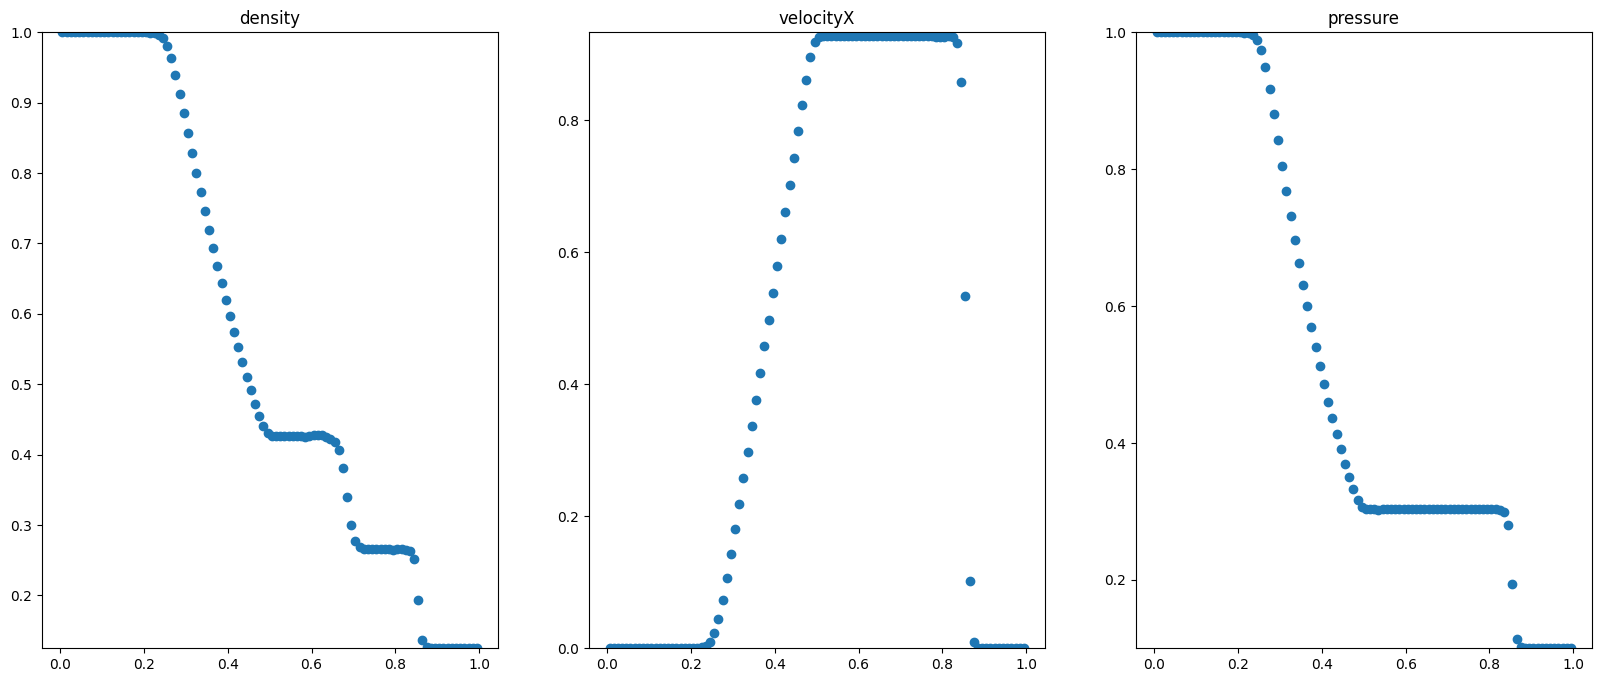

/Users/dbezgin/Documents/research/devtools/miniconda3/envs/venv_jaxfluids_github/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [5]:
nrows_ncols = (1,3)
create_lineplot(data_dict, cell_centers, times, nrows_ncols=nrows_ncols, interval=100, static_time=0.2)